In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/divvy-trips-2019-q1/Divvy_Trips_2019_Q2.csv
/kaggle/input/divvy-trips-2019-q1/Divvy_Trips_2019_Q3.csv
/kaggle/input/divvy-trips-2019-q1/Divvy_Trips_2019_Q4.csv
/kaggle/input/divvy-trips-2019-q1/Divvy_Trips_2019_Q1.csv


# Exploratory

In [6]:
df_2019_Q1 = pd.read_csv('/kaggle/input/divvy-trips-2019-q1/Divvy_Trips_2019_Q1.csv')
df_2019_Q1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [7]:
df_2019_Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            365069 non-null  int64  
 1   start_time         365069 non-null  object 
 2   end_time           365069 non-null  object 
 3   bikeid             365069 non-null  int64  
 4   tripduration       365069 non-null  object 
 5   from_station_id    365069 non-null  int64  
 6   from_station_name  365069 non-null  object 
 7   to_station_id      365069 non-null  int64  
 8   to_station_name    365069 non-null  object 
 9   usertype           365069 non-null  object 
 10  gender             345358 non-null  object 
 11  birthyear          347046 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 33.4+ MB


In [8]:
df_2019_Q1.describe()

,trip_id,bikeid,from_station_id,to_station_id,birthyear
count,3.650690e+05,365069.000000,365069.000000,365069.000000,347046.000000
mean,2.196087e+07,3429.484607,198.088816,198.581123,1981.674297
std,1.271750e+05,1923.321025,153.493553,154.468304,11.245683
min,2.174244e+07,1.000000,2.000000,2.000000,1900.000000
25%,2.184876e+07,1777.000000,76.000000,76.000000,1975.000000
50%,2.196183e+07,3489.000000,170.000000,168.000000,1985.000000
75%,2.207182e+07,5157.000000,287.000000,287.000000,1990.000000
max,2.217853e+07,6471.000000,665.000000,665.000000,2003.000000


In [9]:
#Count all null values
df_2019_Q1.isnull().sum()

trip_id                  0
start_time               0
end_time                 0
bikeid                   0
tripduration             0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
usertype                 0
gender               19711
birthyear            18023
dtype: int64

In [10]:
#Count unique values
df_2019_Q1.nunique()

trip_id              365069
start_time           343022
end_time             338367
bikeid                 4769
tripduration           6666
from_station_id         594
from_station_name       594
to_station_id           600
to_station_name         600
usertype                  2
gender                    2
birthyear                73
dtype: int64

# Cleaning process

## Rename columns & change data type for "Tripduration" column

In [11]:
# Convert "Tripduration" to numeric
# Remove commas before converting to numeric
df_2019_Q1["tripduration"] = pd.to_numeric(df_2019_Q1["tripduration"].str.replace(",", ""), errors="coerce")

df_2019_Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            365069 non-null  int64  
 1   start_time         365069 non-null  object 
 2   end_time           365069 non-null  object 
 3   bikeid             365069 non-null  int64  
 4   tripduration       365069 non-null  float64
 5   from_station_id    365069 non-null  int64  
 6   from_station_name  365069 non-null  object 
 7   to_station_id      365069 non-null  int64  
 8   to_station_name    365069 non-null  object 
 9   usertype           365069 non-null  object 
 10  gender             345358 non-null  object 
 11  birthyear          347046 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 33.4+ MB


In [12]:
df_2019_Q2= pd.read_csv('/kaggle/input/divvy-trips-2019-q1/Divvy_Trips_2019_Q2.csv')

df_2019_Q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108163 entries, 0 to 1108162
Data columns (total 12 columns):
 #   Column                                            Non-Null Count    Dtype  
---  ------                                            --------------    -----  
 0   01 - Rental Details Rental ID                     1108163 non-null  int64  
 1   01 - Rental Details Local Start Time              1108163 non-null  object 
 2   01 - Rental Details Local End Time                1108163 non-null  object 
 3   01 - Rental Details Bike ID                       1108163 non-null  int64  
 4   01 - Rental Details Duration In Seconds Uncapped  1108163 non-null  object 
 5   03 - Rental Start Station ID                      1108163 non-null  int64  
 6   03 - Rental Start Station Name                    1108163 non-null  object 
 7   02 - Rental End Station ID                        1108163 non-null  int64  
 8   02 - Rental End Station Name                      1108163 non-null  obje

In [13]:
# Rename columns to match the others'column names

df_2019_Q2.rename(columns={"01 - Rental Details Rental ID":"trip_id"},inplace=True)
df_2019_Q2.rename(columns={"01 - Rental Details Local Start Time":"start_time"},inplace=True)
df_2019_Q2.rename(columns={"01 - Rental Details Local End Time":"end_time"},inplace=True)
df_2019_Q2.rename(columns={"01 - Rental Details Bike ID":"bikeid"},inplace=True)
df_2019_Q2.rename(columns={"01 - Rental Details Duration In Seconds Uncapped":"tripduration"},inplace=True)
df_2019_Q2.rename(columns={"03 - Rental Start Station ID":"from_station_id"},inplace=True)
df_2019_Q2.rename(columns={"03 - Rental Start Station Name":"from_station_name"},inplace=True)
df_2019_Q2.rename(columns={"02 - Rental End Station ID":"to_station_id"},inplace=True)
df_2019_Q2.rename(columns={"02 - Rental End Station Name":"to_station_name"},inplace=True)
df_2019_Q2.rename(columns={"User Type":"usertype"},inplace=True)
df_2019_Q2.rename(columns={"Member Gender":"gender"},inplace=True)
df_2019_Q2.rename(columns={"05 - Member Details Member Birthday Year":"birthyear"},inplace=True)


In [14]:
# Convert "Tripduration" to numeric
# Remove commas before converting to numeric
df_2019_Q2["tripduration"] = pd.to_numeric(df_2019_Q2["tripduration"].str.replace(",", ""), errors="coerce")

In [15]:
df_2019_Q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108163 entries, 0 to 1108162
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   trip_id            1108163 non-null  int64  
 1   start_time         1108163 non-null  object 
 2   end_time           1108163 non-null  object 
 3   bikeid             1108163 non-null  int64  
 4   tripduration       1108163 non-null  float64
 5   from_station_id    1108163 non-null  int64  
 6   from_station_name  1108163 non-null  object 
 7   to_station_id      1108163 non-null  int64  
 8   to_station_name    1108163 non-null  object 
 9   usertype           1108163 non-null  object 
 10  gender             922609 non-null   object 
 11  birthyear          927210 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 101.5+ MB


In [16]:
df_2019_Q3= pd.read_csv('/kaggle/input/divvy-trips-2019-q1/Divvy_Trips_2019_Q3.csv')

df_2019_Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640718 entries, 0 to 1640717
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   trip_id            1640718 non-null  int64  
 1   start_time         1640718 non-null  object 
 2   end_time           1640718 non-null  object 
 3   bikeid             1640718 non-null  int64  
 4   tripduration       1640718 non-null  object 
 5   from_station_id    1640718 non-null  int64  
 6   from_station_name  1640718 non-null  object 
 7   to_station_id      1640718 non-null  int64  
 8   to_station_name    1640718 non-null  object 
 9   usertype           1640718 non-null  object 
 10  gender             1353368 non-null  object 
 11  birthyear          1362624 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 150.2+ MB


In [17]:
# Convert "Tripduration" to numeric
# Remove commas before converting to numeric
df_2019_Q3["tripduration"] = pd.to_numeric(df_2019_Q3["tripduration"].str.replace(",", ""), errors="coerce") 

df_2019_Q3

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,1214.0,117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,1048.0,381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,1554.0,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,1503.0,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,1213.0,168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1640713,25223635,2019-09-30 23:56:27,2019-10-01 00:06:20,5690,593.0,84,Milwaukee Ave & Grand Ave,134,Peoria St & Jackson Blvd,Subscriber,Male,1993.0
1640714,25223636,2019-09-30 23:57:02,2019-10-01 00:02:13,5079,310.0,268,Lake Shore Dr & North Blvd,85,Michigan Ave & Oak St,Subscriber,Male,1992.0
1640715,25223637,2019-09-30 23:57:45,2019-10-01 00:01:41,5535,235.0,423,University Ave & 57th St,426,Ellis Ave & 60th St,Customer,Male,2000.0
1640716,25223638,2019-09-30 23:57:47,2019-10-01 00:04:41,6120,414.0,110,Dearborn St & Erie St,31,Franklin St & Chicago Ave (Temp),Subscriber,Male,1986.0


In [18]:
df_2019_Q4= pd.read_csv('/kaggle/input/divvy-trips-2019-q1/Divvy_Trips_2019_Q4.csv')

df_2019_Q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704054 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            704054 non-null  int64  
 1   start_time         704054 non-null  object 
 2   end_time           704054 non-null  object 
 3   bikeid             704054 non-null  int64  
 4   tripduration       704054 non-null  object 
 5   from_station_id    704054 non-null  int64  
 6   from_station_name  704054 non-null  object 
 7   to_station_id      704054 non-null  int64  
 8   to_station_name    704054 non-null  object 
 9   usertype           704054 non-null  object 
 10  gender             637463 non-null  object 
 11  birthyear          642373 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 64.5+ MB


In [19]:
# Convert "Tripduration" to numeric
# Remove commas before converting to numeric
df_2019_Q4["tripduration"] = pd.to_numeric(df_2019_Q4["tripduration"].str.replace(",", ""), errors="coerce")

df_2019_Q4

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987.0
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998.0
2,25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991.0
3,25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,2350.0,313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990.0
4,25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,1867.0,210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987.0
...,...,...,...,...,...,...,...,...,...,...,...,...
704049,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,1172.0,112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981.0
704050,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,1533.0,90,Millennium Park,90,Millennium Park,Subscriber,Male,1992.0
704051,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967.0
704052,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970.0


### Filling missing values in "gender" by calculating proportion of male and female then filling in accordingly 

#### df_2019_Q1


In [20]:
# Calculate proportions

gender_counts = df_2019_Q1["gender"].value_counts()
total_counts =gender_counts.sum()

male_ratio=gender_counts.get("Male")/total_counts
female_ratio=gender_counts.get("Female")/total_counts

In [21]:
# Generate random genders based on the ratios
num_missing = df_2019_Q1["gender"].isna().sum()
random_genders = np.random.choice(["Male","Female"],size = num_missing, p = [male_ratio,female_ratio])

df_2019_Q1.loc[df_2019_Q1["gender"].isna(),"gender"] = random_genders

In [22]:
df_2019_Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            365069 non-null  int64  
 1   start_time         365069 non-null  object 
 2   end_time           365069 non-null  object 
 3   bikeid             365069 non-null  int64  
 4   tripduration       365069 non-null  float64
 5   from_station_id    365069 non-null  int64  
 6   from_station_name  365069 non-null  object 
 7   to_station_id      365069 non-null  int64  
 8   to_station_name    365069 non-null  object 
 9   usertype           365069 non-null  object 
 10  gender             365069 non-null  object 
 11  birthyear          347046 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 33.4+ MB


### df_2019_Q2

In [23]:
# Calculate proportions

gender_counts = df_2019_Q2["gender"].value_counts()
total_counts =gender_counts.sum()

male_ratio=gender_counts.get("Male")/total_counts
female_ratio=gender_counts.get("Female")/total_counts

In [24]:
# Generate random genders based on the ratios
num_missing = df_2019_Q2["gender"].isna().sum()
random_genders = np.random.choice(["Male","Female"],size = num_missing, p = [male_ratio,female_ratio])

df_2019_Q2.loc[df_2019_Q2["gender"].isna(),"gender"] = random_genders

In [25]:
df_2019_Q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108163 entries, 0 to 1108162
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   trip_id            1108163 non-null  int64  
 1   start_time         1108163 non-null  object 
 2   end_time           1108163 non-null  object 
 3   bikeid             1108163 non-null  int64  
 4   tripduration       1108163 non-null  float64
 5   from_station_id    1108163 non-null  int64  
 6   from_station_name  1108163 non-null  object 
 7   to_station_id      1108163 non-null  int64  
 8   to_station_name    1108163 non-null  object 
 9   usertype           1108163 non-null  object 
 10  gender             1108163 non-null  object 
 11  birthyear          927210 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 101.5+ MB


### df_2019_Q3

In [26]:
# Calculate proportions

gender_counts = df_2019_Q3["gender"].value_counts()
total_counts =gender_counts.sum()

male_ratio=gender_counts.get("Male")/total_counts
female_ratio=gender_counts.get("Female")/total_counts

In [27]:
# Generate random genders based on the ratios
num_missing = df_2019_Q3["gender"].isna().sum()
random_genders = np.random.choice(["Male","Female"],size = num_missing, p = [male_ratio,female_ratio])

df_2019_Q3.loc[df_2019_Q3["gender"].isna(),"gender"] = random_genders

In [28]:
df_2019_Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640718 entries, 0 to 1640717
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   trip_id            1640718 non-null  int64  
 1   start_time         1640718 non-null  object 
 2   end_time           1640718 non-null  object 
 3   bikeid             1640718 non-null  int64  
 4   tripduration       1640718 non-null  float64
 5   from_station_id    1640718 non-null  int64  
 6   from_station_name  1640718 non-null  object 
 7   to_station_id      1640718 non-null  int64  
 8   to_station_name    1640718 non-null  object 
 9   usertype           1640718 non-null  object 
 10  gender             1640718 non-null  object 
 11  birthyear          1362624 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 150.2+ MB


### df_2019_Q4

In [29]:
# Calculate proportions

gender_counts = df_2019_Q4["gender"].value_counts()
total_counts =gender_counts.sum()

male_ratio=gender_counts.get("Male")/total_counts
female_ratio=gender_counts.get("Female")/total_counts

In [30]:
# Generate random genders based on the ratios
num_missing = df_2019_Q4["gender"].isna().sum()
random_genders = np.random.choice(["Male","Female"],size = num_missing, p = [male_ratio,female_ratio])

df_2019_Q4.loc[df_2019_Q4["gender"].isna(),"gender"] = random_genders

In [31]:
df_2019_Q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704054 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            704054 non-null  int64  
 1   start_time         704054 non-null  object 
 2   end_time           704054 non-null  object 
 3   bikeid             704054 non-null  int64  
 4   tripduration       704054 non-null  float64
 5   from_station_id    704054 non-null  int64  
 6   from_station_name  704054 non-null  object 
 7   to_station_id      704054 non-null  int64  
 8   to_station_name    704054 non-null  object 
 9   usertype           704054 non-null  object 
 10  gender             704054 non-null  object 
 11  birthyear          642373 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 64.5+ MB


## Filled missing values in birthyear using the median based on usertype and quarter of the year
## Added an age column by subtracting birth year from 2019
## Created a weekday column to indicate the day of the week for each trip.

In [32]:
# Assuming dataset is from 2020
current_year = 2020

### df_2019_Q1

In [33]:
median_subcriber = df_2019_Q1.loc[df_2019_Q1["usertype"] == "Subscriber", "birthyear"].median()
median_customer = df_2019_Q1.loc[df_2019_Q1["usertype"] == "Customer", "birthyear"].median()
print(median_subcriber)
print(median_customer)

df_2019_Q1.loc[(df_2019_Q1["usertype"] == "Subscriber") & (df_2019_Q1["birthyear"].isna()), "birthyear"] = median_subcriber
df_2019_Q1.loc[(df_2019_Q1["usertype"] == "Customer") & (df_2019_Q1["birthyear"].isna()), "birthyear"] = median_customer


1985.0
1992.0


In [34]:
# Calculate age
df_2019_Q1["age"] = current_year - df_2019_Q1["birthyear"]

In [35]:
# Add column day_of_week  (1=sunday, 7=saturday)
df_2019_Q1["start_time"] = pd.to_datetime(df_2019_Q1["start_time"])
df_2019_Q1["day_of_week"] = df_2019_Q1["start_time"].dt.weekday + 2  
df_2019_Q1["day_of_week"] = df_2019_Q1["day_of_week"].replace({8: 1})

In [36]:
df_2019_Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            365069 non-null  int64         
 1   start_time         365069 non-null  datetime64[ns]
 2   end_time           365069 non-null  object        
 3   bikeid             365069 non-null  int64         
 4   tripduration       365069 non-null  float64       
 5   from_station_id    365069 non-null  int64         
 6   from_station_name  365069 non-null  object        
 7   to_station_id      365069 non-null  int64         
 8   to_station_name    365069 non-null  object        
 9   usertype           365069 non-null  object        
 10  gender             365069 non-null  object        
 11  birthyear          365069 non-null  float64       
 12  age                365069 non-null  float64       
 13  day_of_week        365069 non-null  int32   

### df_2019_Q2

In [37]:
median_subcriber = df_2019_Q2.loc[df_2019_Q2["usertype"] == "Subscriber", "birthyear"].median()
median_customer = df_2019_Q2.loc[df_2019_Q2["usertype"] == "Customer", "birthyear"].median()
print(median_subcriber)
print(median_customer)

df_2019_Q2.loc[(df_2019_Q2["usertype"] == "Subscriber") & (df_2019_Q2["birthyear"].isna()), "birthyear"] = median_subcriber
df_2019_Q2.loc[(df_2019_Q2["usertype"] == "Customer") & (df_2019_Q2["birthyear"].isna()), "birthyear"] = median_customer


1987.0
1991.0


In [38]:
# Calculate age
df_2019_Q2["age"] = current_year - df_2019_Q2["birthyear"]

In [39]:
# Add column day_of_week  (1=sunday, 7=saturday)
df_2019_Q2["start_time"] = pd.to_datetime(df_2019_Q2["start_time"])
df_2019_Q2["day_of_week"] = df_2019_Q2["start_time"].dt.weekday + 2  
df_2019_Q2["day_of_week"] = df_2019_Q2["day_of_week"].replace({8: 1})

In [40]:
df_2019_Q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108163 entries, 0 to 1108162
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   trip_id            1108163 non-null  int64         
 1   start_time         1108163 non-null  datetime64[ns]
 2   end_time           1108163 non-null  object        
 3   bikeid             1108163 non-null  int64         
 4   tripduration       1108163 non-null  float64       
 5   from_station_id    1108163 non-null  int64         
 6   from_station_name  1108163 non-null  object        
 7   to_station_id      1108163 non-null  int64         
 8   to_station_name    1108163 non-null  object        
 9   usertype           1108163 non-null  object        
 10  gender             1108163 non-null  object        
 11  birthyear          1108163 non-null  float64       
 12  age                1108163 non-null  float64       
 13  day_of_week        1108163 

### df_2019_Q3

In [41]:
median_subcriber = df_2019_Q3.loc[df_2019_Q3["usertype"] == "Subscriber", "birthyear"].median()
median_customer = df_2019_Q3.loc[df_2019_Q3["usertype"] == "Customer", "birthyear"].median()
print(median_subcriber)
print(median_customer)

df_2019_Q3.loc[(df_2019_Q3["usertype"] == "Subscriber") & (df_2019_Q3["birthyear"].isna()), "birthyear"] = median_subcriber
df_2019_Q3.loc[(df_2019_Q3["usertype"] == "Customer") & (df_2019_Q3["birthyear"].isna()), "birthyear"] = median_customer


1988.0
1991.0


In [42]:
# Calculate age
df_2019_Q3["age"] = current_year - df_2019_Q3["birthyear"]

In [43]:
# Add column day_of_week  (1=sunday, 7=saturday)
df_2019_Q3["start_time"] = pd.to_datetime(df_2019_Q3["start_time"])
df_2019_Q3["day_of_week"] = df_2019_Q3["start_time"].dt.weekday + 2  
df_2019_Q3["day_of_week"] = df_2019_Q3["day_of_week"].replace({8: 1})

In [44]:
df_2019_Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640718 entries, 0 to 1640717
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   trip_id            1640718 non-null  int64         
 1   start_time         1640718 non-null  datetime64[ns]
 2   end_time           1640718 non-null  object        
 3   bikeid             1640718 non-null  int64         
 4   tripduration       1640718 non-null  float64       
 5   from_station_id    1640718 non-null  int64         
 6   from_station_name  1640718 non-null  object        
 7   to_station_id      1640718 non-null  int64         
 8   to_station_name    1640718 non-null  object        
 9   usertype           1640718 non-null  object        
 10  gender             1640718 non-null  object        
 11  birthyear          1640718 non-null  float64       
 12  age                1640718 non-null  float64       
 13  day_of_week        1640718 

### df_2019_Q4

In [45]:
median_subcriber = df_2019_Q4.loc[df_2019_Q4["usertype"] == "Subscriber", "birthyear"].median()
median_customer = df_2019_Q4.loc[df_2019_Q4["usertype"] == "Customer", "birthyear"].median()
print(median_subcriber)
print(median_customer)

df_2019_Q4.loc[(df_2019_Q4["usertype"] == "Subscriber") & (df_2019_Q4["birthyear"].isna()), "birthyear"] = median_subcriber
df_2019_Q4.loc[(df_2019_Q4["usertype"] == "Customer") & (df_2019_Q4["birthyear"].isna()), "birthyear"] = median_customer


1987.0
1991.0


In [46]:
# Calculate age
df_2019_Q4["age"] = current_year - df_2019_Q4["birthyear"]

In [47]:
# Add column day_of_week  (1=sunday, 7=saturday)
df_2019_Q4["start_time"] = pd.to_datetime(df_2019_Q4["start_time"])
df_2019_Q4["day_of_week"] = df_2019_Q4["start_time"].dt.weekday + 2  
df_2019_Q4["day_of_week"] = df_2019_Q4["day_of_week"].replace({8: 1})

In [48]:
df_2019_Q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704054 entries, 0 to 704053
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            704054 non-null  int64         
 1   start_time         704054 non-null  datetime64[ns]
 2   end_time           704054 non-null  object        
 3   bikeid             704054 non-null  int64         
 4   tripduration       704054 non-null  float64       
 5   from_station_id    704054 non-null  int64         
 6   from_station_name  704054 non-null  object        
 7   to_station_id      704054 non-null  int64         
 8   to_station_name    704054 non-null  object        
 9   usertype           704054 non-null  object        
 10  gender             704054 non-null  object        
 11  birthyear          704054 non-null  float64       
 12  age                704054 non-null  float64       
 13  day_of_week        704054 non-null  int32   

## Merging data (stacking vertically)


In [49]:
df = pd.concat([df_2019_Q1,df_2019_Q2,df_2019_Q3,df_2019_Q4], ignore_index=True)
df

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,day_of_week
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,31.0,3
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,30.0,3
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,26.0,3
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,1783.0,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,27.0,3
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,26.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817999,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,1172.0,112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981.0,39.0,3
3818000,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,1533.0,90,Millennium Park,90,Millennium Park,Subscriber,Male,1992.0,28.0,3
3818001,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967.0,53.0,3
3818002,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970.0,50.0,3


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818004 entries, 0 to 3818003
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   trip_id            int64         
 1   start_time         datetime64[ns]
 2   end_time           object        
 3   bikeid             int64         
 4   tripduration       float64       
 5   from_station_id    int64         
 6   from_station_name  object        
 7   to_station_id      int64         
 8   to_station_name    object        
 9   usertype           object        
 10  gender             object        
 11  birthyear          float64       
 12  age                float64       
 13  day_of_week        int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(5)
memory usage: 407.8+ MB


In [51]:
len(df)

3818004

In [52]:
# Count unique values
df.nunique()

trip_id              3818004
start_time           3306090
end_time             3238342
bikeid                  6017
tripduration           21542
from_station_id          616
from_station_name        640
to_station_id            617
to_station_name          641
usertype                   2
gender                     2
birthyear                 94
age                       94
day_of_week                7
dtype: int64

In [53]:
# Count duplicated
df.duplicated().sum()

0

In [54]:
df.isnull().sum()

trip_id              0
start_time           0
end_time             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
age                  0
day_of_week          0
dtype: int64

In [55]:
df.describe()

,trip_id,start_time,bikeid,tripduration,from_station_id,to_station_id,birthyear,age,day_of_week
count,3.818004e+06,3818004,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06
mean,2.391563e+07,2019-07-19 21:47:37.115991808,3.380252e+03,1.450203e+03,2.016659e+02,2.026363e+02,1.985050e+03,3.495016e+01,4.064086e+00
min,2.174244e+07,2019-01-01 00:04:37,1.000000e+00,6.100000e+01,1.000000e+00,1.000000e+00,1.759000e+03,6.000000e+00,1.000000e+00
25%,2.287379e+07,2019-05-29 15:49:26.500000,1.727000e+03,4.110000e+02,7.700000e+01,7.700000e+01,1.981000e+03,2.900000e+01,2.000000e+00
50%,2.396232e+07,2019-07-25 17:50:54,3.451000e+03,7.090000e+02,1.740000e+02,1.740000e+02,1.989000e+03,3.100000e+01,4.000000e+00
75%,2.496370e+07,2019-09-15 06:48:05.750000128,5.046000e+03,1.283000e+03,2.890000e+02,2.910000e+02,1.991000e+03,3.900000e+01,6.000000e+00
max,2.596290e+07,2019-12-31 23:57:17,6.946000e+03,1.062840e+07,6.730000e+02,6.730000e+02,2.014000e+03,2.610000e+02,7.000000e+00
std,1.212667e+06,NaN,1.902511e+03,2.985414e+04,1.560798e+02,1.562388e+02,1.035792e+01,1.035792e+01,1.915346e+00


### Create age groups

In [56]:
# Define age bins and labels
bins = [0, 25, 35, 45, 60, 100]  
labels = ['18-25', '26-35', '36-45', '46-60', '60+']

# Create a new column for Age Groups
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818004 entries, 0 to 3818003
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   trip_id            int64         
 1   start_time         datetime64[ns]
 2   end_time           object        
 3   bikeid             int64         
 4   tripduration       float64       
 5   from_station_id    int64         
 6   from_station_name  object        
 7   to_station_id      int64         
 8   to_station_name    object        
 9   usertype           object        
 10  gender             object        
 11  birthyear          float64       
 12  age                float64       
 13  day_of_week        int64         
 14  age_group          category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(5), object(5)
memory usage: 411.4+ MB


# Analyze

In [58]:
df["usertype"].unique()

array(['Subscriber', 'Customer'], dtype=object)

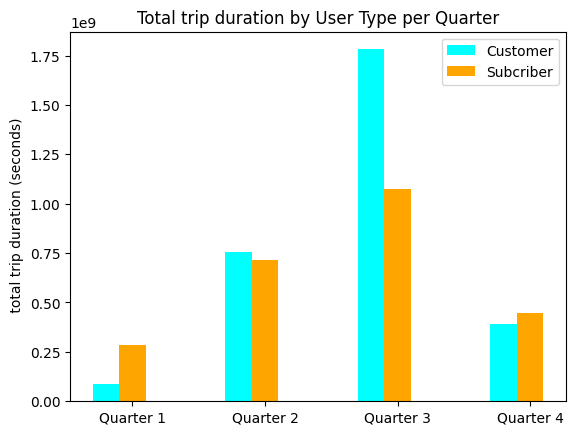

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute total trip duration for each quarter
x=np.arange(4)
y1 = [
    df_2019_Q1.loc[df_2019_Q1["usertype"] == "Customer", "tripduration"].sum(),
    df_2019_Q2.loc[df_2019_Q2["usertype"] == "Customer", "tripduration"].sum(),
    df_2019_Q3.loc[df_2019_Q3["usertype"] == "Customer", "tripduration"].sum(),
    df_2019_Q4.loc[df_2019_Q4["usertype"] == "Customer", "tripduration"].sum()
]

y2 = [
    df_2019_Q1.loc[df_2019_Q1["usertype"] == "Subscriber", "tripduration"].sum(),
    df_2019_Q2.loc[df_2019_Q2["usertype"] == "Subscriber", "tripduration"].sum(),
    df_2019_Q3.loc[df_2019_Q3["usertype"] == "Subscriber", "tripduration"].sum(),
    df_2019_Q4.loc[df_2019_Q4["usertype"] == "Subscriber", "tripduration"].sum()
]
width =0.2

plt.bar(x-0.2, y1, width, color='cyan') 
plt.bar(x, y2, width, color='orange') 
plt.xticks(x, ['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4'])
plt.ylabel(" total trip duration (seconds)")
plt.title("Total trip duration by User Type per Quarter")
plt.legend(["Customer", "Subcriber"]) 
plt.show() 

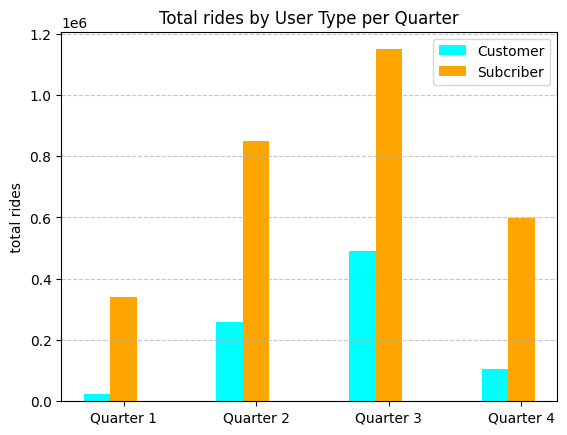

In [60]:
# Compute total rides for each quarter
x=np.arange(4)
y1 = [
    df_2019_Q1[df_2019_Q1["usertype"] == "Customer"].shape[0],
    df_2019_Q2[df_2019_Q2["usertype"] == "Customer"].shape[0],
    df_2019_Q3[df_2019_Q3["usertype"] == "Customer"].shape[0],
    df_2019_Q4[df_2019_Q4["usertype"] == "Customer"].shape[0]
]

y2 = [
    df_2019_Q1[df_2019_Q1["usertype"] == "Subscriber"].shape[0],
    df_2019_Q2[df_2019_Q2["usertype"] == "Subscriber"].shape[0],
    df_2019_Q3[df_2019_Q3["usertype"] == "Subscriber"].shape[0],
    df_2019_Q4[df_2019_Q4["usertype"] == "Subscriber"].shape[0]
    ]
width =0.2

plt.bar(x-0.2, y1, width, color='cyan') 
plt.bar(x, y2, width, color='orange') 
plt.xticks(x, ['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4'])
plt.ylabel(" total rides ")
plt.legend(["Customer", "Subcriber"]) 
plt.title("Total rides by User Type per Quarter")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() 

The first bar chart illustrates that the total trip duration for customers was generally equal to or higher than that of subscribers. Especially, in Quarter 3, customer trip duration was significantly higher compared to that of subscribers.

In contrast, the second chart shows that the total number of rides taken by customers was consistently much lower than that of subscribers in every quarter. This contrast suggests a few possible explanations:

- Subscribers primarily use bikes for commuting to work, leading to frequent but shorter trips.

- Customers, on the other hand, likely use bikes for leisure, particularly for exercising, which results in longer trip durations.

Lets dig into it.

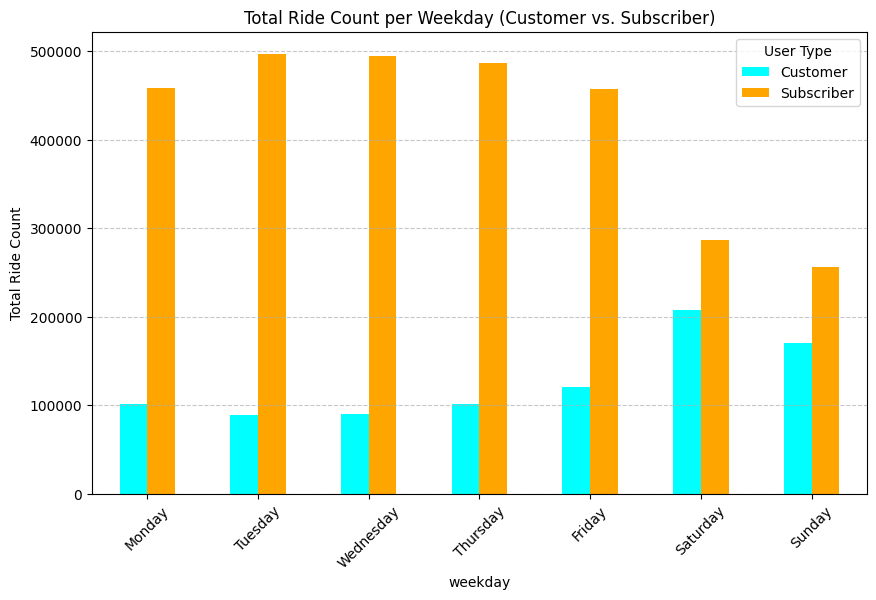

In [61]:
# Define weekday mapping
weekday_mapping = {
    2: "Monday", 3: "Tuesday", 4: "Wednesday", 5: "Thursday",
    6: "Friday", 7: "Saturday", 1: "Sunday"
}

# Convert 'day_of_week' column to categorical weekday names
df['weekday'] = df['day_of_week'].map(weekday_mapping)

# Group by weekday and usertype, then count rides
avg_rides = df.groupby(['weekday', 'usertype']).size().unstack()

# Sort weekdays in order
avg_rides = avg_rides.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
avg_rides.plot(kind='bar', ax=ax, color=['cyan', 'orange'])

plt.ylabel("Total Ride Count")
plt.title("Total Ride Count per Weekday (Customer vs. Subscriber)")
plt.legend(title="User Type")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


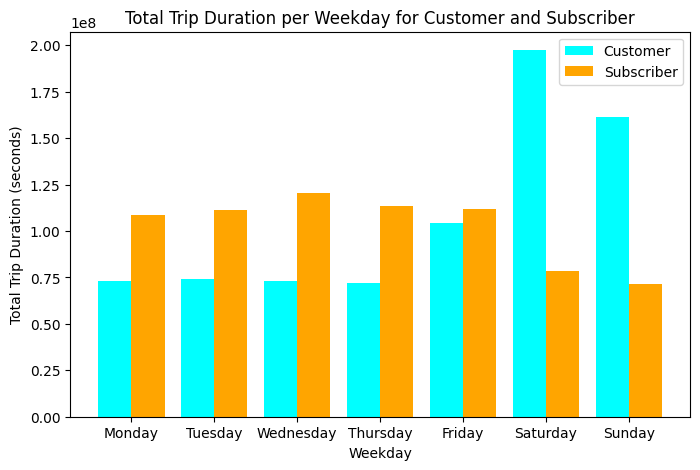

In [62]:

# Group by weekday and user type, then calculate the total trip duration
avg_duration = df_2019_Q2.groupby(['day_of_week', 'usertype'])['tripduration'].sum().unstack()

# Define weekday order (1 = Sunday, 7 = Saturday)
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_duration = avg_duration.reindex([2, 3, 4, 5, 6, 7, 1])

# Set positions for grouped bars
x = range(len(avg_duration))
width = 0.4  # Width of bars
plt.figure(figsize=(8, 5))
plt.bar([i - width/2 for i in x], avg_duration['Customer'], width=width, color='cyan', label='Customer')
plt.bar([i + width/2 for i in x], avg_duration['Subscriber'], width=width, color='orange', label='Subscriber')
plt.xticks(ticks=x, labels=weekday_labels)
plt.ylabel('Total Trip Duration (seconds)')
plt.xlabel('Weekday')
plt.title('Total Trip Duration per Weekday for Customer and Subscriber')
plt.legend()
plt.show()


The third chart shows that subscribers take more rides from Monday to Friday, but fewer on weekends. This suggests they mostly use bikes for commuting, though some still ride for exercise on weekends. Customers, on the other hand, ride more on weekends than weekdays, likely using bikes for leisure and fun on weekends and for exercise on regular days.

The fourth chart adds more detail to this pattern. Subscribers have longer trip durations on weekdays and shorter ones on weekends, supporting the idea that they use bikes mainly for commuting. Customers take fewer rides on weekdays but ride for a long time throughout the week. This suggests they use bikes more for exercise, where how long they ride matters more than how often.

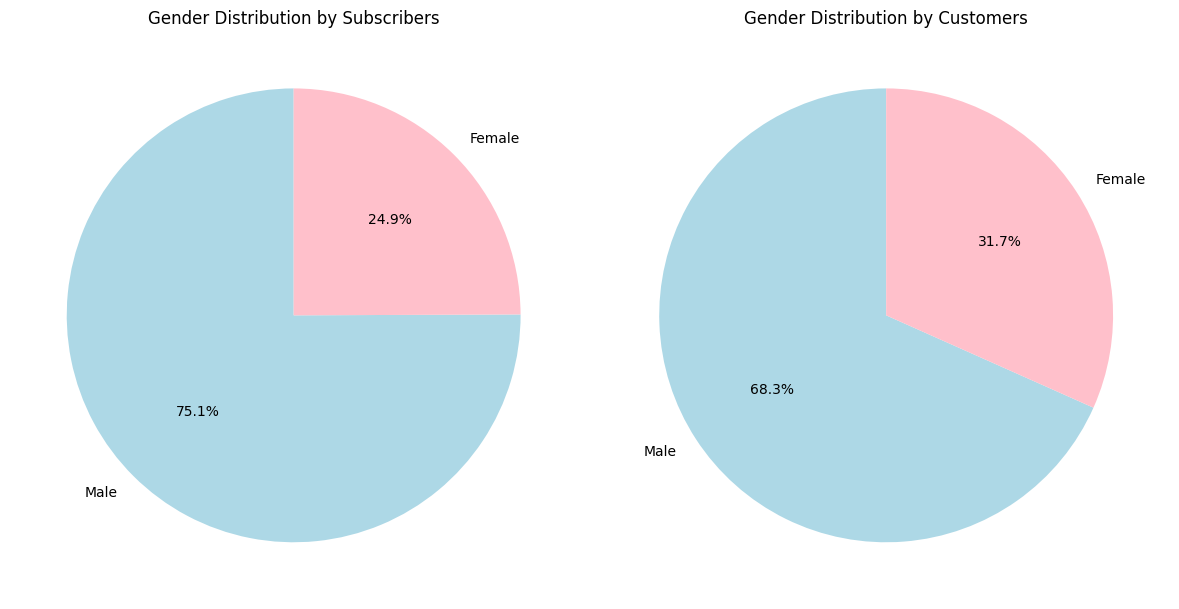

In [63]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Data for Subscribers
counts_subscriber = [
    df.loc[(df["usertype"] == "Subscriber") & (df["gender"] == "Male")].shape[0], 
    df.loc[(df["usertype"] == "Subscriber") & (df["gender"] == "Female")].shape[0]
]

# Data for Customers
counts_customer = [
    df.loc[(df["usertype"] == "Customer") & (df["gender"] == "Male")].shape[0], 
    df.loc[(df["usertype"] == "Customer") & (df["gender"] == "Female")].shape[0]
]

# Pie chart for Subscribers
axes[0].pie(counts_subscriber, labels=["Male", "Female"], autopct='%1.1f%%', 
            startangle=90, colors=['lightblue', 'pink'])
axes[0].set_title("Gender Distribution by Subscribers")

# Pie chart for Customers
axes[1].pie(counts_customer, labels=["Male", "Female"], autopct='%1.1f%%', 
            startangle=90, colors=['lightblue', 'pink'])
axes[1].set_title("Gender Distribution by Customers")

plt.tight_layout()
plt.show()


These pie charts show the difference in female proportions between the two user types. The percentage of female subscribers is 7% lower than that of female customers

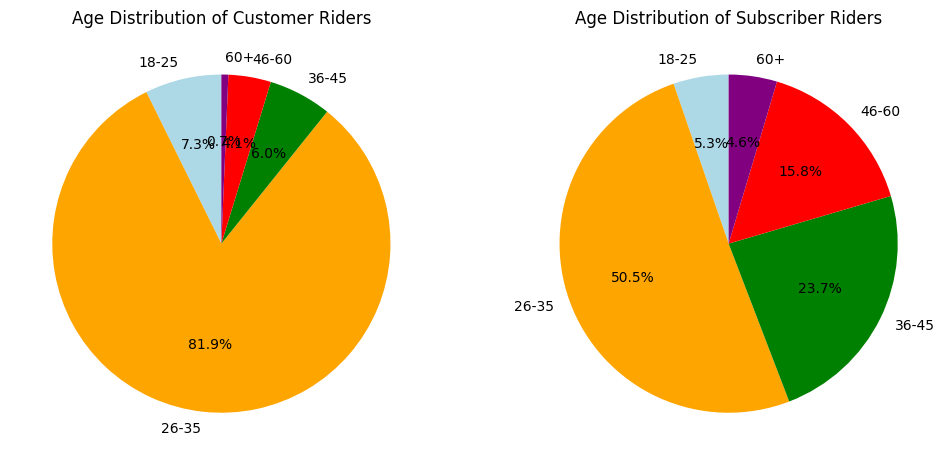

In [64]:
# Ensure correct filtering and value counting
age_counts_customer = df.loc[df["usertype"] == "Customer", "age_group"].value_counts().reindex(labels)
age_counts_subscriber = df.loc[df["usertype"] == "Subscriber", "age_group"].value_counts().reindex(labels)

# Create subplots
fig, axis = plt.subplots(1, 2, figsize=(12, 6))

# Plot pie chart for Customers
axis[0].pie(age_counts_customer, labels=age_counts_customer.index, autopct='%1.1f%%', startangle=90, 
            colors=['lightblue', 'orange', 'green', 'red', 'purple'])
axis[0].set_title("Age Distribution of Customer Riders")

# Plot pie chart for Subscribers
axis[1].pie(age_counts_subscriber, labels=age_counts_subscriber.index, autopct='%1.1f%%', startangle=90, 
            colors=['lightblue', 'orange', 'green', 'red', 'purple'])
axis[1].set_title("Age Distribution of Subscriber Riders")


plt.show()


It is clear that the 26-35 age group has the highest number of subscribers. However, when compared to customers, the difference is significant, with 81% of customers falling into this category compared to only 50.5% of subscribers. Meanwhile, those aged 36 and older tend to subscribe at a much higher rate than customers.

In [65]:
# Export to csv for further visualization

df_2019_Q1.to_csv("divvy_trips_2019_Q1",index=False)
df_2019_Q2.to_csv("divvy_trips_2019_Q2",index=False)
df_2019_Q3.to_csv("divvy_trips_2019_Q3",index=False)
df_2019_Q4.to_csv("divvy_trips_2019_Q4",index=False)
df.to_csv("divvy_trips_2019_2020",index=False)